In [1]:
#defining fourth order runge kutta method

def fourth_order_runge_kutta(f, x0, y0, h, num_steps):
    xValues = [x0]
    yValues = [y0]
    
    for i in range(num_steps):
        x = xValues[-1]
        y = yValues[-1]
        
        k1 = h * f(y)
        k2 = h * f(y + k1/2)
        k3 = h * f(y + k2/2)
        k4 = h * f(y + k3)
        
        xNew = x + h
        yNew = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        xValues.append(xNew)
        yValues.append(yNew)
        
    return xValues, yValues

In [2]:
#part3
#b
def f(x):
    return (0.1 * x) - (0.001 * (x**2))

def solve_bacteria_population(x0, num_st):
    h = 0.01  # Step size
    
    xValues, yValues = fourth_order_runge_kutta(f, 0, x0, h, num_st)

    final_population = yValues[-1]
    return final_population

x0 = 2000
num_st = 400

finalPopulation = solve_bacteria_population(x0, num_st)
print("Amount of bacteria after 4 hours:", finalPopulation)


Amount of bacteria after 4 hours: 275.3334619861144


In [6]:
#part3
#c
import numpy as np
#percentage error

error = (np.abs(finalPopulation-275.3335)/275.3335)*100
print("Percentage error:",error)

Percentage error: 1.3806487628428267e-05


In [7]:
#part4
#c
def f(x):
    return (5-x)/2

tValues , xValues = fourth_order_runge_kutta(f, 0 , 0, 0.01, 400)


print("x value:",xValues[-1])

x value: 4.323323583809859


In [9]:
#part4
#c
#percentage error

error = (np.abs(xValues[-1]-4.3234)/4.3234)*100
print("Percentage error:",error)

Percentage error: 0.0017675022006055905


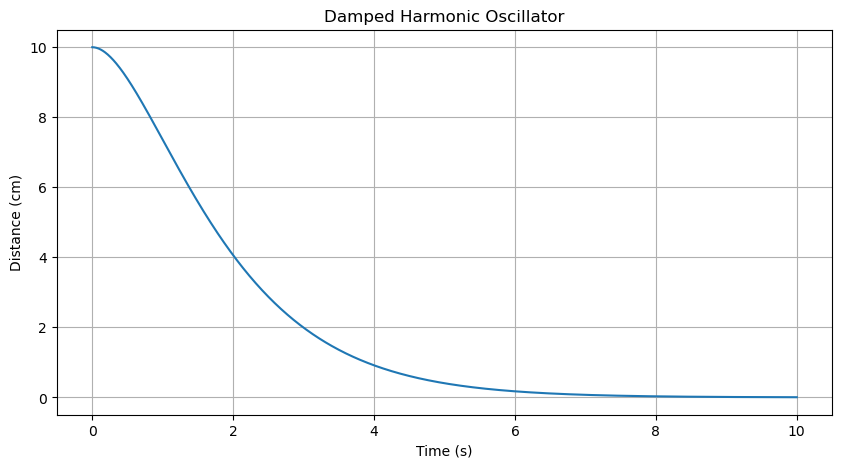

In [11]:
#part5
#defining fourth order runge kutta method

import math
import matplotlib.pyplot as plt

def fourth_order_runge_kutta_dho(f, x0, v0, h, num_steps):
    
    tValues = [0]
    xValues = [x0]
    vValues = [v0]
    
    for i in range(num_steps):
        t = tValues[-1]
        x = xValues[-1]
        v = vValues[-1]
        
        k1_x = h * v
        k1_v = h * f(x, t, v)
        
        k2_x = h * (v + 0.5 * k1_v)
        k2_v = h * f(x + 0.5 * k1_x, t + 0.5 * h, v + 0.5 * k1_v)
        
        k3_x = h * (v + 0.5 * k2_v)
        k3_v = h * f(x + 0.5 * k2_x, t + 0.5 * h, v + 0.5 * k2_v)
        
        k4_x = h * (v + k3_v)
        k4_v = h * f(x + k3_x, t + h, v + k3_v)
        
        xNew = x + (1 / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        vNew = v + (1 / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
        
        tNew = t + h
        
        tValues.append(tNew)
        xValues.append(xNew)
        vValues.append(vNew)
        
    return tValues, xValues

def f(x, t, v):
    return -k*x/m - b*v/m

# when b^2 = 4mk
k = 1
m = 1
b = 2 * math.sqrt(k * m)  # b^2 = 4mk
x0 = 10
v0 = 0
h = 0.01
num_steps = 1000

tValues_1, xValues_1 = fourth_order_runge_kutta_dho(f, x0, v0, h, num_steps)

plt.figure(figsize=(10,5))
plt.plot(tValues_1, xValues_1)
plt.xlabel('Time (s)')
plt.ylabel('Distance (cm)')
plt.title('Damped Harmonic Oscillator')
plt.grid(True)
plt.show()